In [2]:
import pandas as pd

In [3]:
# importar csv dos dados de sono
sleep_data = pd.read_csv('data\com.samsung.shealth.sleep.20241201154180.csv', skiprows=1, encoding='UTF-8')

In [4]:
# selecionar colunas com dados relevantes: pontuação de sono e data
sleep_data = sleep_data[['efficiency', 'com.samsung.health.sleep.create_sh_ver']]
sleep_data = sleep_data[sleep_data['efficiency'].notna()]

In [5]:
# renomear coluna de data para melhor visualização
sleep_data = sleep_data.rename(columns={'com.samsung.health.sleep.create_sh_ver': 'date'})

In [6]:
# converter coluna de data para formato de dia/mês
sleep_data['date'] = pd.to_datetime(sleep_data['date']).dt.date

In [7]:
# ajustar o index e criar df agrupado pela data para tratar duplicatas,
# mantendo sempre a pontuação mais alta do dia
sleep_data.reset_index(drop=True, inplace=True)
date_grouped = sleep_data.groupby('date')['efficiency'].max().to_frame()

In [8]:
# resetar o index para tornar 'date' uma coluna
date_grouped.reset_index(inplace=True)

In [9]:
# classificar a array do mais antigo ao mais recente e
# retornar o 
date_grouped = date_grouped.sort_values('date')
date_grouped['date'] = pd.to_datetime(date_grouped['date']).dt.strftime('%d/%m')
date_grouped

,date,efficiency
0,16/10,54.0
1,17/10,72.0
2,18/10,69.0
3,19/10,67.0
4,20/10,69.0
5,21/10,71.0
6,22/10,66.0
7,23/10,48.0
8,24/10,67.0
9,25/10,74.0


In [10]:
date_grouped.set_index('date', inplace=	True)

<Axes: xlabel='date'>

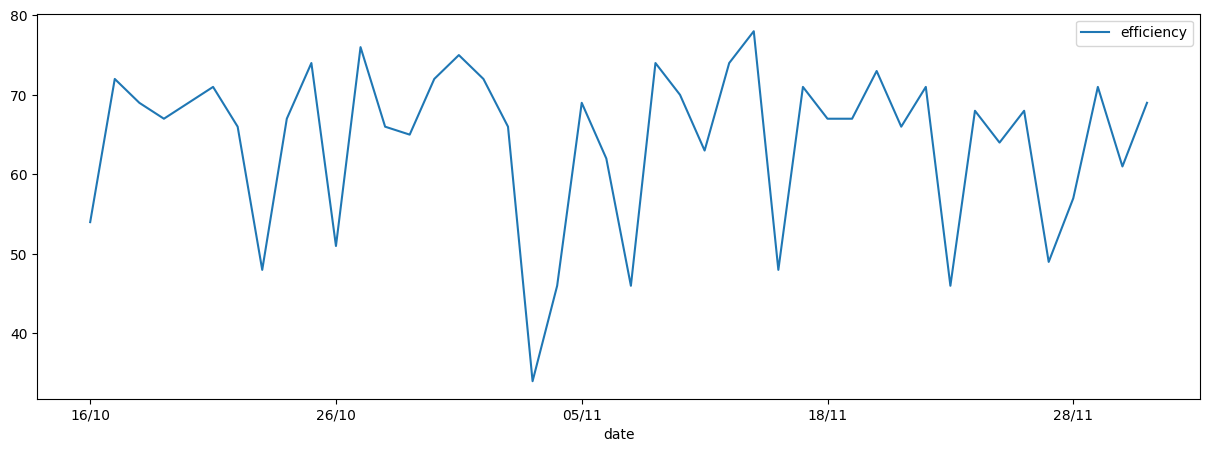

In [11]:
date_grouped.plot(figsize=(15,5), kind='line')

In [12]:
# exportar os dados tratados de sono
date_grouped.to_csv('sleep_treated_data.csv')